In [1]:
import numpy as np
import scipy.sparse as sps
import porepy as pp

import ddf.common as co
import ddf.hrl as hrl

from ddf.plot import quiver, plot_cells, streamplot
from ddf.immagini import *

In [2]:
b = 0.08
mdg, dati = hrl.artificiali(b, Nx=60)
pb = hrl.HRL(mdg, dati, dict(nome='art', esporta=1))
pb.init()
pb.steady_state();

In [3]:
sD = mdg.subdomains()[0]
ci = pb.condizioni_iniziali_sd(sD)

concentrazione = co.raccogli_stato(pb.mdg, 'concentrazione', sD)
pressione = co.raccogli_stato(pb.mdg, 'pressione', sD)
cc = sD.cell_centers
u = co.raccogli_stato(pb.mdg, 'vu', sD)
delta_i = co.raccogli_stato(pb.mdg, 'vi', sD); delta_i[1,:] += 1
delta_concentrazione = concentrazione - ci['concentrazione']
delta_pressione = pressione - ci['pressione']

dw = 1/(1 + 1/b)

max_u = np.linalg.norm(np.linalg.norm(u, axis=0), np.inf)
max_di = np.linalg.norm(np.linalg.norm(delta_i, axis=0), np.inf)

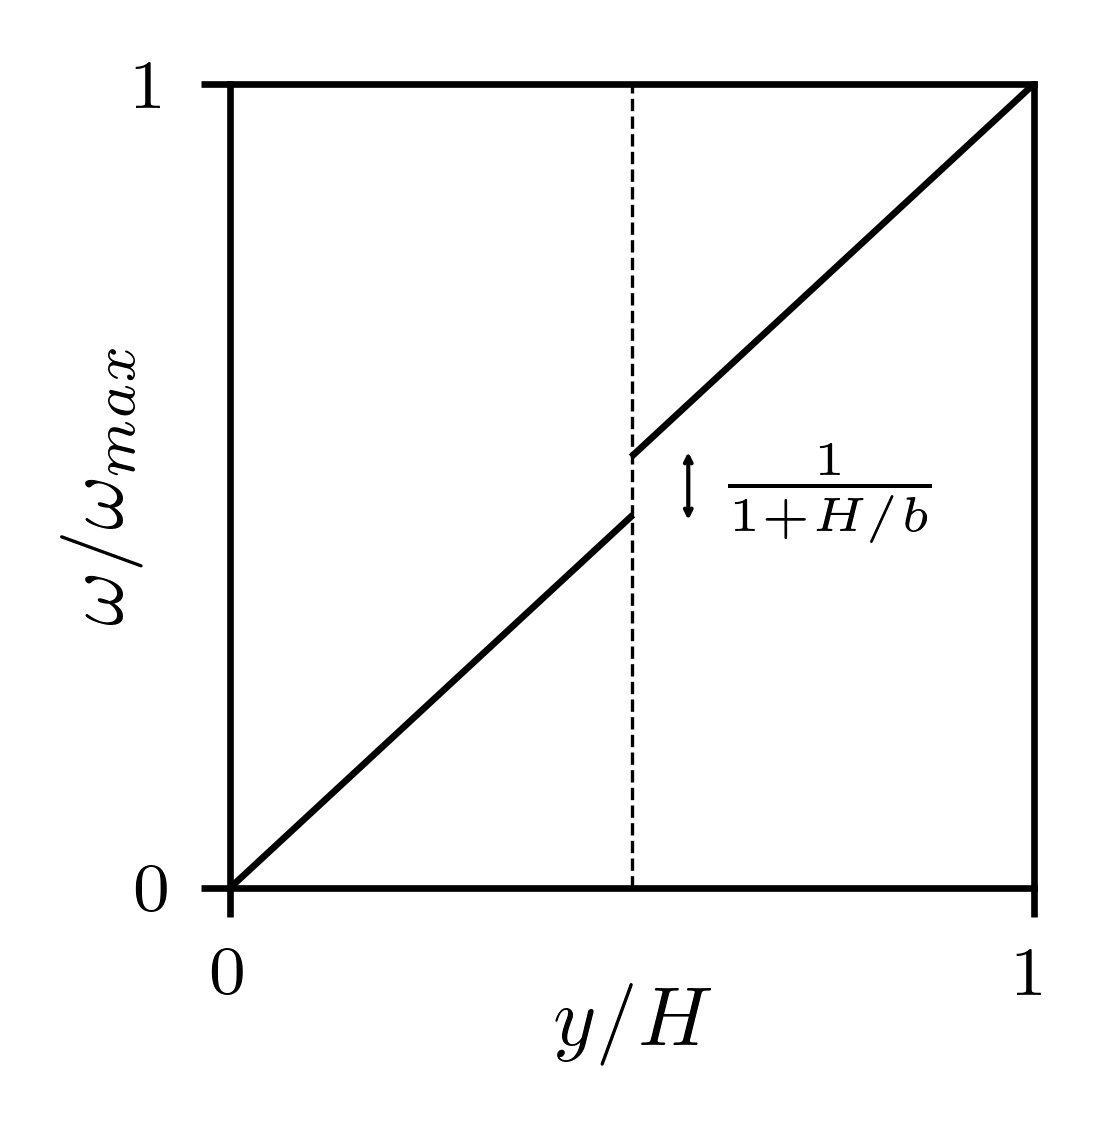

In [4]:
fig,ax = plt.subplots(figsize=(linewidth*0.25, linewidth*0.25))

N = 256
ys = np.linspace(0, 1, N)
linear = ys
piecewise = np.zeros(N)
piecewise[ys < 0.5] = ( ys*(1 - dw) )[ys < 0.5]
piecewise[ys >= 0.5] = ( ys*(1 - dw) + dw )[ys >= 0.5]

ax.plot(ys[ys < 0.5], piecewise[ys < 0.5], c='black', linestyle='solid', linewidth=0.8)
ax.plot(ys[ys > 0.5], piecewise[ys > 0.5], c='black', linestyle='solid', linewidth=0.8)
ax.set_xlabel('$ y/H $', labelpad=-3)
ax.set_ylabel(r'$ \omega/\omega_{max} $', labelpad=-1)
ax.set_aspect(1)
dd = 1.7
ax.add_patch(matplotlib.patches.FancyArrowPatch((0.57,0.5+dd*dw/2), (0.57,0.5-dd*dw/2), arrowstyle='<->', linewidth=0.5, mutation_scale=2))
ax.text(0.62, 0.49, r'$ \frac{1}{1+H/b} $', fontsize='small', va='center')
ax.axvline(0.5, c='black', linewidth=0.4, linestyle='dashed')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize='small')


fig.tight_layout(pad=0)
fig.savefig('../immagini/flussi artificiali 5.png', **sf_kw)

In [5]:
# fig,axs = plt.subplots(1,2, figsize=(linewidth*0.7, linewidth*0.7/2), subplot_kw={'aspect': 1, 'xticks': [], 'yticks': [], })

# levels = np.linspace(0, 1, 11)
# plot_cells(pb, 'concentrazione', ax=axs[0], fratture_lw=3, fill=0, colors='k', Nx=200, method='cubic', levels=levels, linewidths=0.5)
# axs[0].set_title('$ \omega $')

# plot_cells(pb, concentrazione*0, ax=axs[1], fratture_lw=3, fill=0)
# quiver(pb, delta_i, subdomains=[sD], ax=axs[1], mask=np.linalg.norm(delta_i, axis=0) > 0.1*max_di, scale=6)
# axs[1].set_title(r'$ \delta \boldsymbol{i} $')

# fig.tight_layout()
# fig.savefig('immagini/flussi artificiali 1.png', transparent=1, bbox_inches='tight')

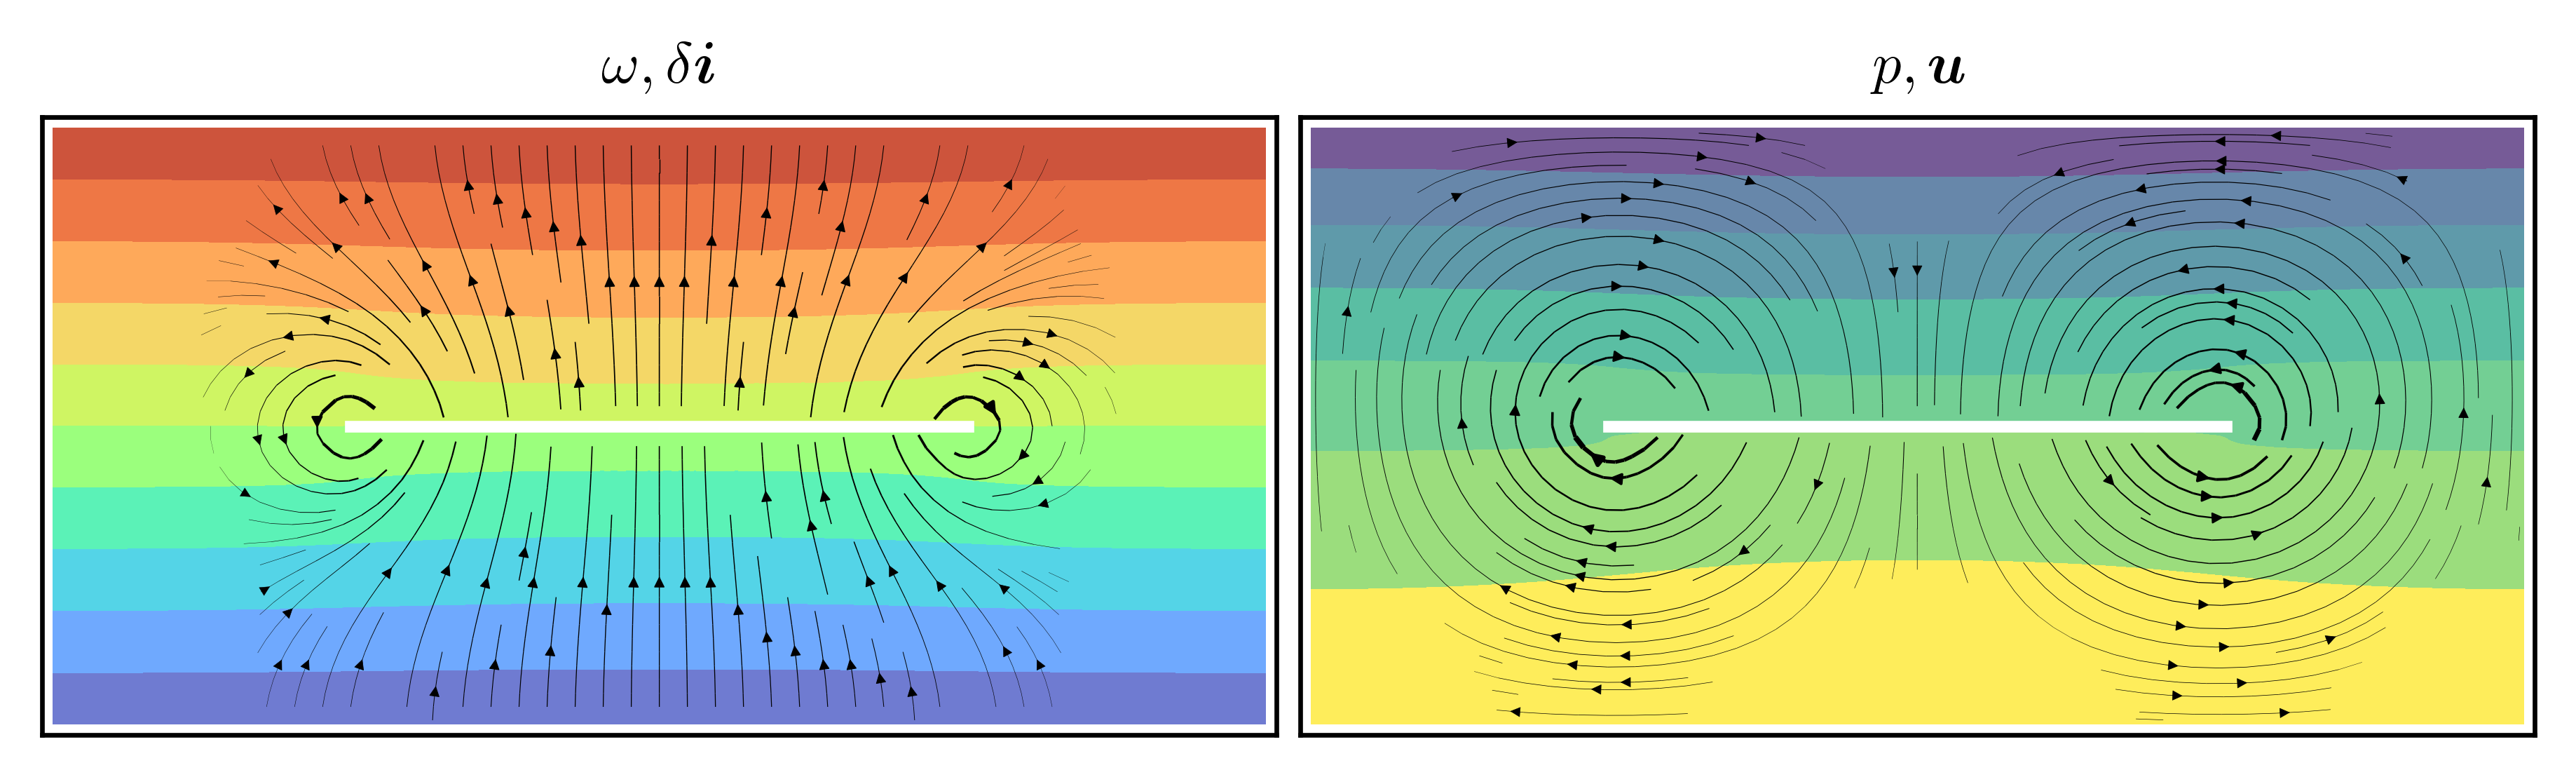

In [6]:
from ddf.immagini import *

fig,axs = plt.subplots(1,2,figsize=(linewidth*0.9, linewidth*0.9/2/2*1.1))

ax = axs[0]
plot_cells(pb, 'concentrazione', ax=ax, fratture_lw=2, alpha=1, **pc_w)
streamplot(pb, delta_i, ax=ax, max_lw=1, arrowsize=0.4)
ax.set_title(r'$ \omega, \delta \boldsymbol{i} $')

ax = axs[1]
plot_cells(pb, 'pressione', ax=ax, fratture_lw=2, alpha=1, cmap=cmap_p)
streamplot(pb, u, ax=ax, max_lw=1.5, arrowsize=0.4)
ax.set_title(r'$ p, \boldsymbol{u} $')

fig.tight_layout(pad=0.4)
fig.savefig('../immagini/flussi artificiali 1.png', **sf_kw)

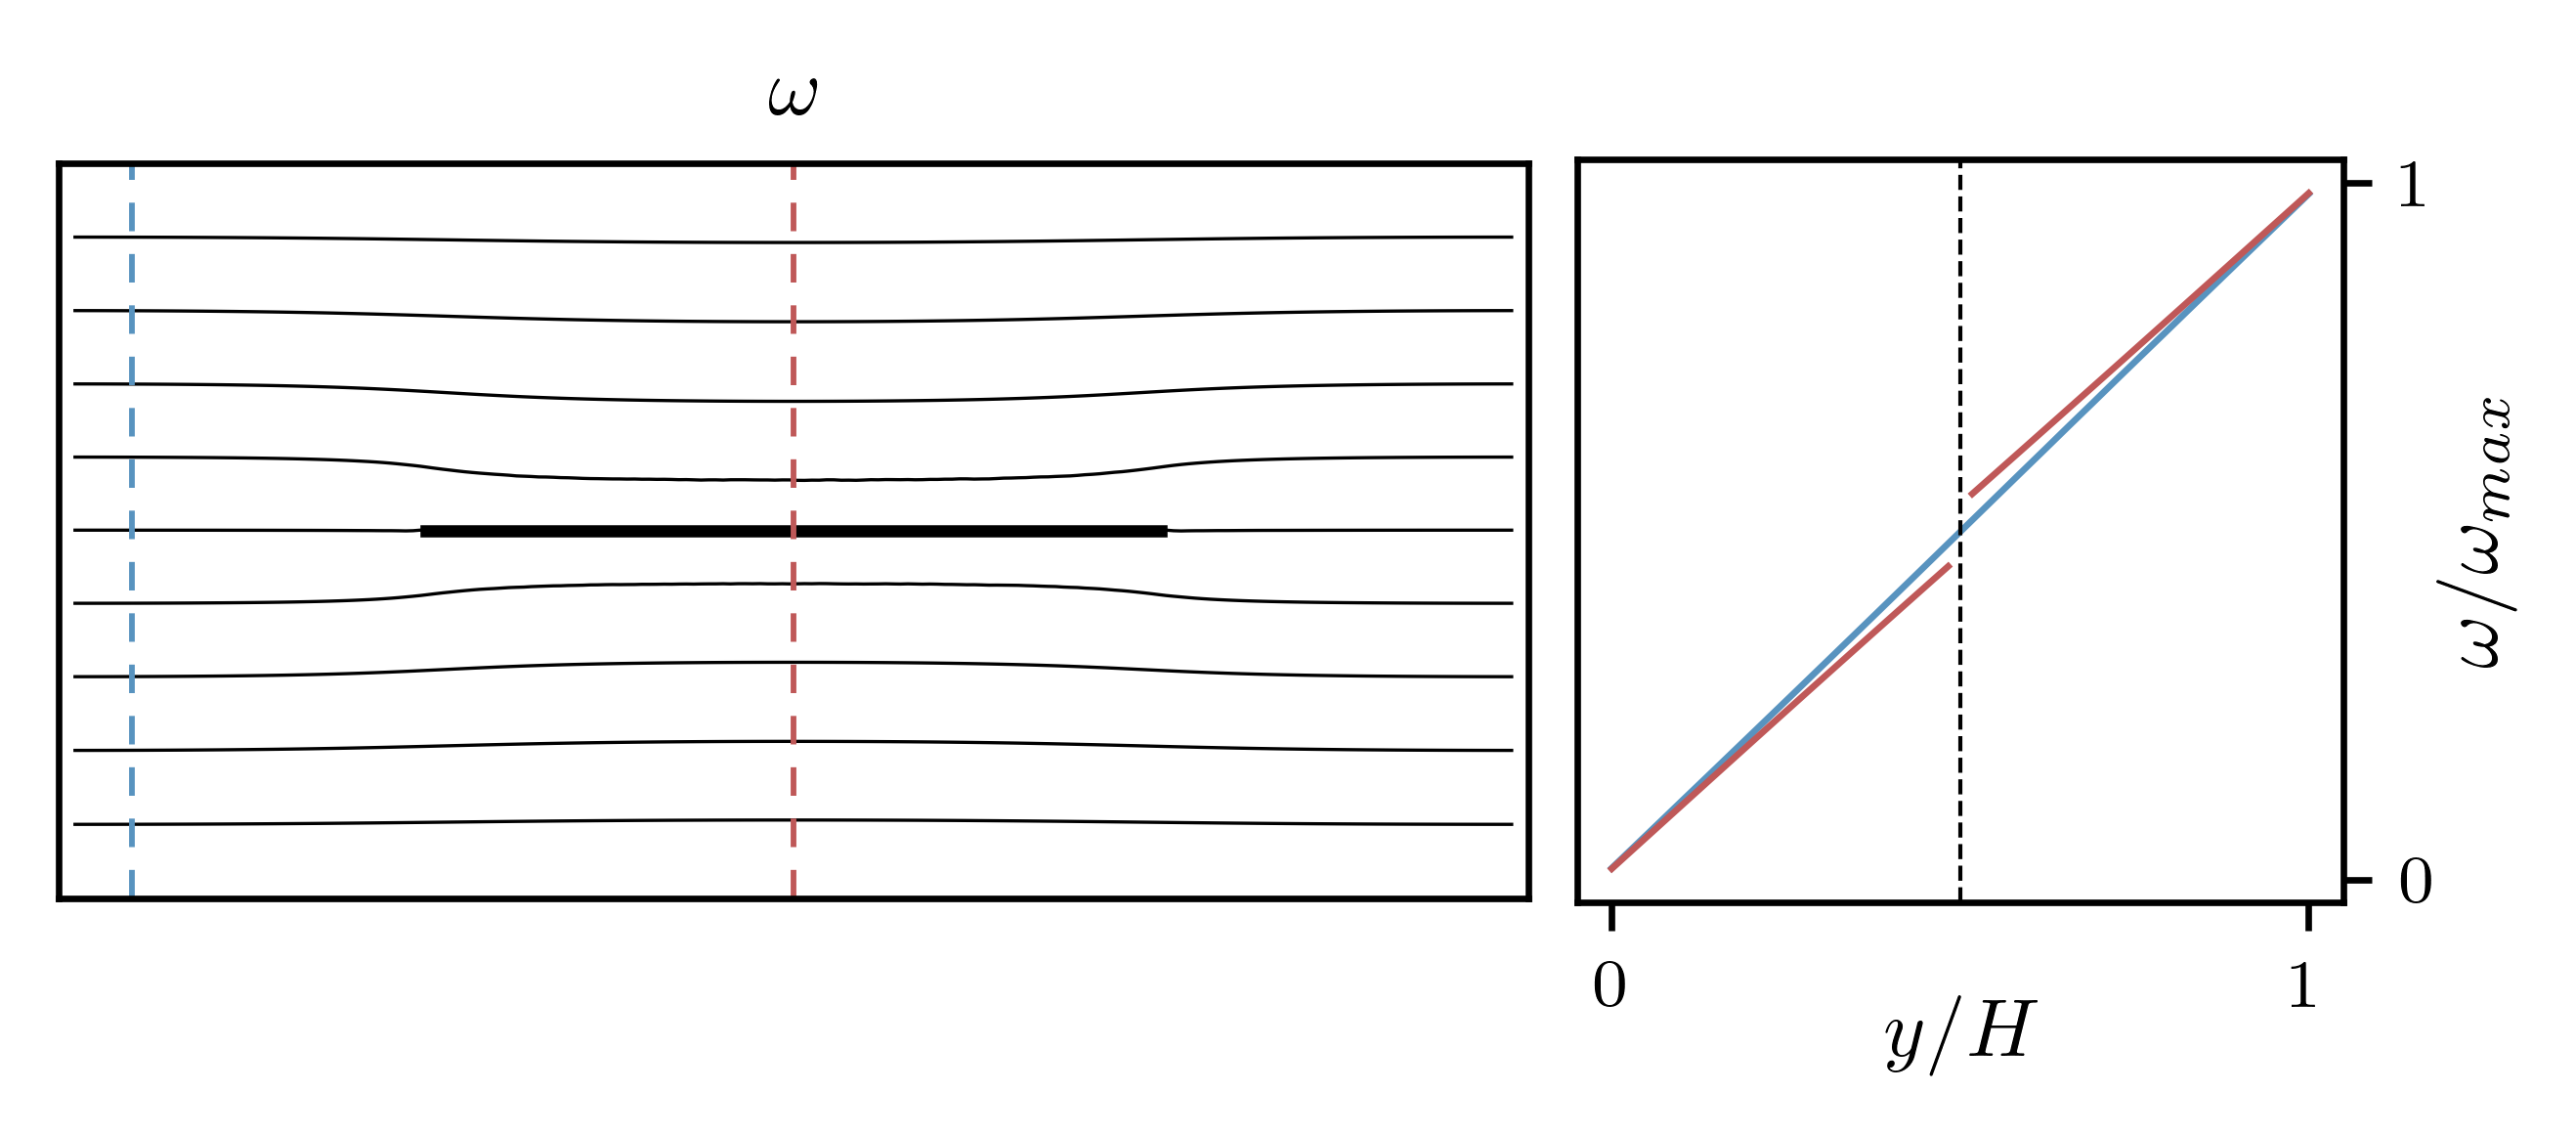

In [7]:
from scipy.interpolate import griddata

N = 30
X0 = np.ones(N) * 0.1
X1 = np.ones(N) * 1.0
Y = np.linspace(0, 1, N)

F0 = griddata((cc[0,:],cc[1,:]), concentrazione, (X0, Y), method='nearest')
F1 = griddata((cc[0,:],cc[1,:]), concentrazione, (X1, Y), method='nearest')

ws = .46
fig,axs = plt.subplots(1,2, figsize=(linewidth*0.65, linewidth*0.65/2.4), subplot_kw={ 'aspect': 1 }, width_ratios=[ws, .7-ws])

# ax0.axvline(0.5)
# ax0.axhline(0.5 + delta_w/2)
# ax0.axhline(0.5 - delta_w/2)

levels = np.linspace(0, 1, 11)
plot_cells(pb, 'concentrazione', ax=axs[0], fratture_lw=1.5, fill=0, colors='black', Nx=200, method='cubic', levels=levels, linewidths=0.4, alpha=1)
axs[0].plot(X0, Y, c=blu, linestyle='dashed', dashes=(5, 4), linewidth=0.7)
axs[0].plot(X1, Y, c=rosso, linestyle='dashed', dashes=(5, 4), linewidth=0.7)
axs[0].set_xticks([]); axs[0].set_yticks([])
axs[0].set_title('$ \omega $')

axs[1].plot(Y, F0, c=blu, linestyle='solid', linewidth=0.8)
axs[1].plot(Y[Y < 0.5], F1[Y < 0.5], c=rosso, linestyle='solid', linewidth=0.8)
axs[1].plot(Y[Y > 0.5], F1[Y > 0.5], c=rosso, linestyle='solid', linewidth=0.8)
axs[1].axvline(0.5, linewidth=0.5, c='k', linestyle='dashed')
axs[1].set_yticks([ 0, 0.5, 1])
axs[1].set_ylabel(r'$ \omega/\omega_{max} $', labelpad=0)
axs[1].set_xlabel('$ y/H $', labelpad=-3)
axs[1].tick_params(axis='both', which='major')
# axs[1].tick_params(axis='both', which='major', labelsize='small')
axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")
axs[1].set_yticks([0, 1])
axs[1].set_xticks([0, 1])

fig.tight_layout(pad=0.6)
fig.savefig('../immagini/flussi artificiali 2.png', **sf_kw)

In [8]:
# fig,axs = plt.subplots(1,2, figsize=(linewidth*0.7, linewidth*0.7/2), subplot_kw={'aspect': 1, 'xticks': [], 'yticks': [], })

# levels = np.linspace(2*np.min(ci['pressione']), np.max(ci['pressione']), 11)
# plot_cells(pb, 'pressione', ax=axs[0], fratture_lw=3, fill=0, colors='k', Nx=200, method='cubic', levels=levels, linewidths=0.5)
# axs[0].set_title('$ p $')

# plot_cells(pb, 0, ax=axs[1], fratture_lw=3, fill=0, solo_fratture=1)
# streamplot(pb, u, ax=axs[1], soglia=0.05, arrowsize=0.4, max_lw=2.5)
# # quiver(pb, u, subdomains=[sD], ax=axs[1], mask=np.linalg.norm(delta_i, axis=0) > 0.2*max_u, scale=3)
# axs[1].set_title(r'$ \boldsymbol{u} $')

# fig.tight_layout()
# fig.savefig('immagini/flussi artificiali 3.png', transparent=1, bbox_inches='tight')